# Trop to Tokyou using data

Lets import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bring in the data

In [2]:
df = pd.read_csv('AB_TYO_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4196,28,18,2018-07-28,0.20
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,10975,3,156,2019-05-21,1.65
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4196,30,107,2019-05-25,1.25
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66344,139.65593,Entire home/apt,6994,29,99,2019-05-07,1.55
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3981,30,101,2019-05-03,1.24


In [3]:
df.shape

(11466, 14)

Remove useless columns

In [4]:
# Columns with all Nan values 
df.columns[df.isnull().all()]

Index(['neighbourhood_group'], dtype='object')

In [5]:
# We are going to drop the neighbourhood_group column
df.drop('neighbourhood_group', axis=1, inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,Shibuya Ku,35.67152,139.71203,Private room,4196,28,18,2018-07-28,0.20
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,Sumida Ku,35.71721,139.82596,Entire home/apt,10975,3,156,2019-05-21,1.65
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,Nerima Ku,35.74267,139.65810,Entire home/apt,4196,30,107,2019-05-25,1.25
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",Setagaya Ku,35.66344,139.65593,Entire home/apt,6994,29,99,2019-05-07,1.55
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,Nerima Ku,35.74264,139.65832,Entire home/apt,3981,30,101,2019-05-03,1.24


Fill missing values

In [6]:
df.columns[df.isnull().any()]

Index(['host_name', 'last_review', 'reviews_per_month'], dtype='object')

In [7]:
fill_with_mode = lambda col: col.fillna(method = 'ffill')
df = df.apply(fill_with_mode)
df.columns[df.isnull().any()]

Index([], dtype='object')

Look at data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d9b97b910>,
      dtype=object)

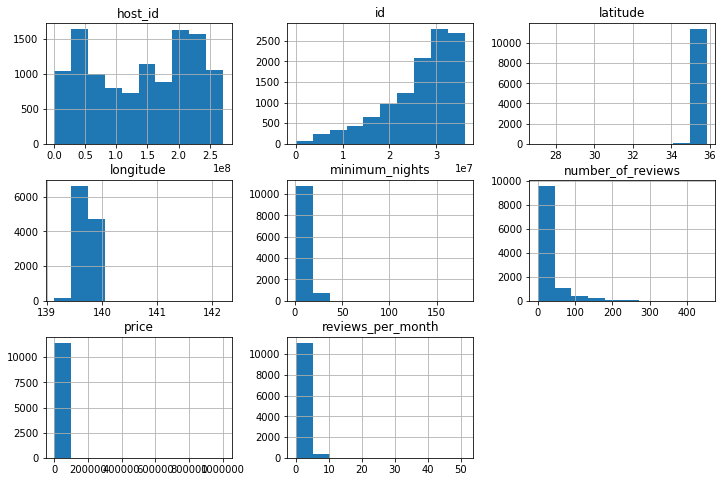

In [8]:
df.hist(figsize=(12, 8))

Find answers to our questions

## Lets see which type of rooms are most popular in Tokyo

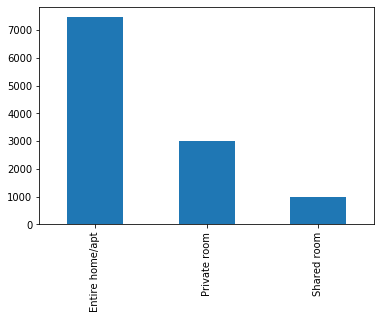

In [9]:
df['room_type'].value_counts().plot.bar();

So it looks like entire home/apartment is the most popular choice in tokyo

# Which room type is the most costly on an average 

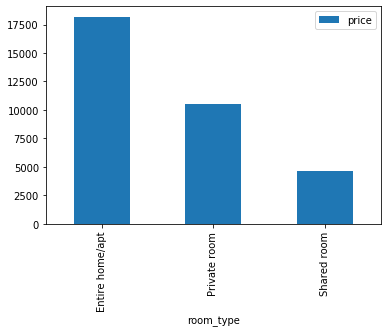

In [12]:
df[['room_type', 'price']].groupby('room_type').mean().plot.bar();

It looks like Entire home/apartment are the most costly on an average

# Dose the location of room mater when it comes to pricing ?

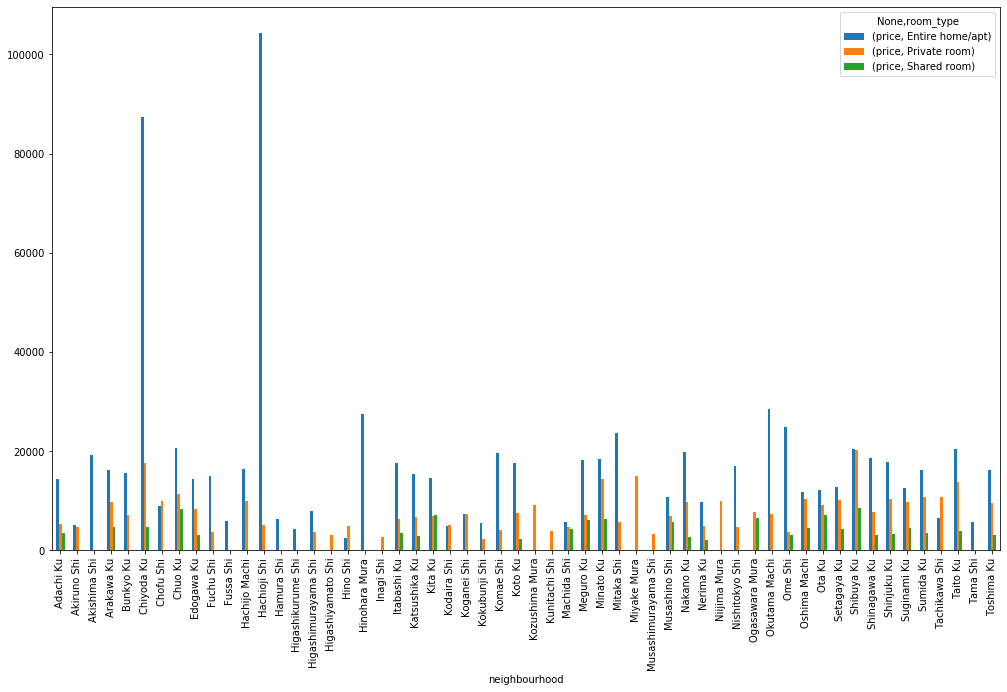

In [13]:
unstacked_df = df[['room_type', 'price', 'neighbourhood']].groupby(['neighbourhood', 'room_type']).mean().unstack()
unstacked_df.plot.bar(figsize=(17, 10));

# Where are you most likemy to find a room

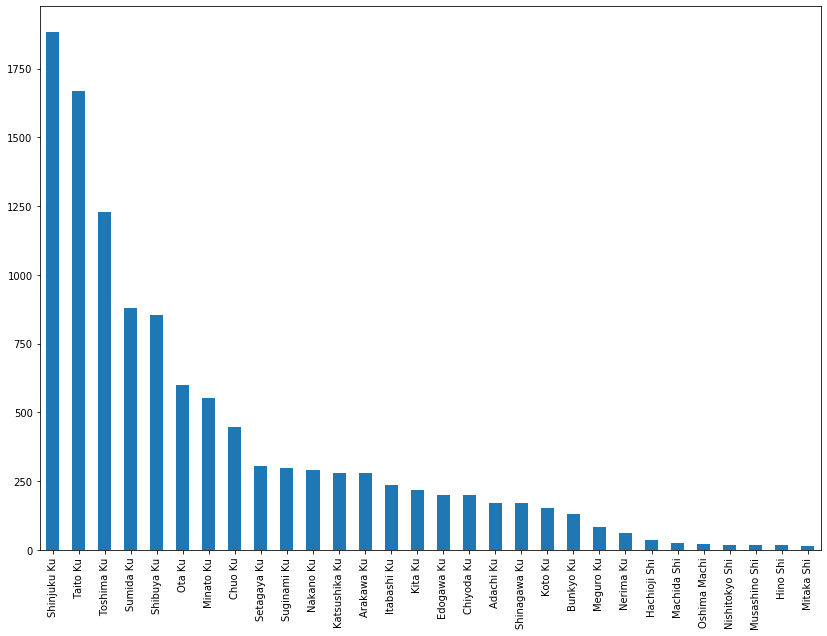

In [14]:
df['neighbourhood'].value_counts()[:30].plot.bar(figsize=(14, 10));

# Conclusion
1. Entire house/apartment are the most famous (according to listings)
1. Entire house/apartment are the most expensive on an average
1. Your location matters a lot on how much you pay
1. You can find most rooms at shinjuku ku